<a href="https://colab.research.google.com/github/Naseungchae/Lpoint_recommendation/blob/main/CAPSTONE_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE DESIGN_PROJECT(ongoing project)**

- **프로젝트 배경**  
: 제조공정에서 데이터 분석은 제품 생산 라인의 성능, 품질, 안정성 등을 향상시키기 위한 필수적인 과정이라고 생각합니다.  
데이터 분석을 통해 생산 라인에서 발생하는 데이터를 수집하고, 분석하여 문제를 발견하고 이를 해결하는 방안을 찾아내는 것은  
제조 과정에서 생산성과 효율성을 높이는 데 큰 역할을 할 수 있다고 생각합니다.

- **프로젝트 기간**  
: 2023-03 ~ 2023-06

- **프로젝트 진행자**  
: 201804200 나승채

- **프로젝트 목적**  
: 제조공정을 최적화하여 생산효율을 높이고 운영 비효율을 낮추는 것

- **프로젝트 세부 목표** :  
  - 데이터 불균형을 고려한 고장예측  
  - 이상치 탐지  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Data description
- **index** : 고유 기기 식별자

- **product_id** : 제품 식별자
- **product_type** : 제품 유형
  - L : 낮은정도의 복잡성을 갖는 공정
  - M : 중간정도의 복잡성을 갖는 공정
  - H : 높은정도의 복잡성을 갖는 공정

- **air_temp** : 기계 주변 공기의 온도(K)

- **process_temp** : 기계 내부 고정의 온도(K)

- **r_speed** : 기계의 회전속도(rpm)  
    <i>(=회전하는 장비의 속도)</i>

- **torque** : 토크(Nm)  
    <i>(=회전하는 장비에서 발생하는 힘)</i>

- **tool_wear** : 공구의 마모 시간(m)

- **target** : 0은 고장X, 1은 고장

- **failure_type** : 고장의 경우 그 원인

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/capstone/dataset/predictive_maintenance.csv', index_col = 0)

df= df.rename(columns = {'Product ID' : 'product_id',
                          'Type' : 'product_type',
                          'Air temperature [K]' : 'air_temp',
                          'Process temperature [K]' : 'process_temp',
                          'Rotational speed [rpm]' : 'r_speed',
                          'Torque [Nm]' : 'torque',
                          'Tool wear [min]' : 'tool_wear',
                          'Target' : 'target',
                          'Failure Type' : 'failure_type'})

df.index.name = None

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    10000 non-null  object 
 1   product_type  10000 non-null  object 
 2   air_temp      10000 non-null  float64
 3   process_temp  10000 non-null  float64
 4   r_speed       10000 non-null  int64  
 5   torque        10000 non-null  float64
 6   tool_wear     10000 non-null  int64  
 7   target        10000 non-null  int64  
 8   failure_type  10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


In [ ]:
df.head()

,product_id,product_type,air_temp,process_temp,r_speed,torque,tool_wear,target,failure_type
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Data understanding & cleansing

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df[['air_temp', 'process_temp', 'r_speed', 'torque', 'tool_wear']].describe()

,air_temp,process_temp,r_speed,torque,tool_wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


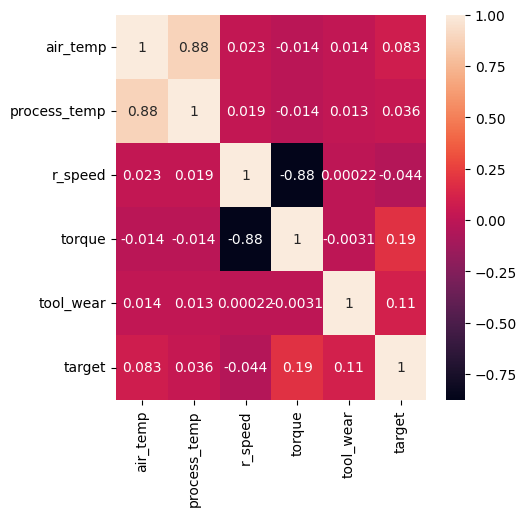

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True);

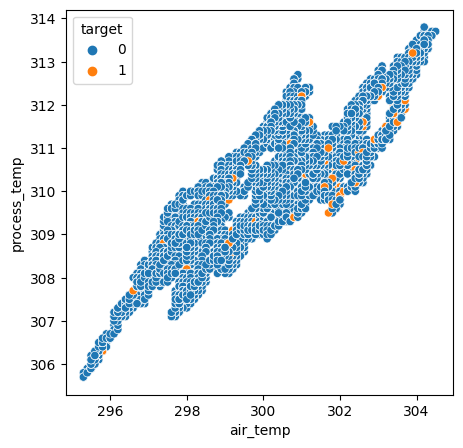

In [ ]:
# air_temp, process_temp
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='air_temp', y='process_temp', hue='target', data=df);

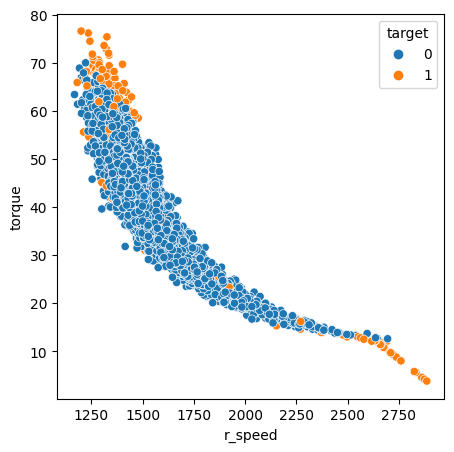

In [ ]:
# r_speed, torque
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='r_speed', y='torque', hue='target', data=df);

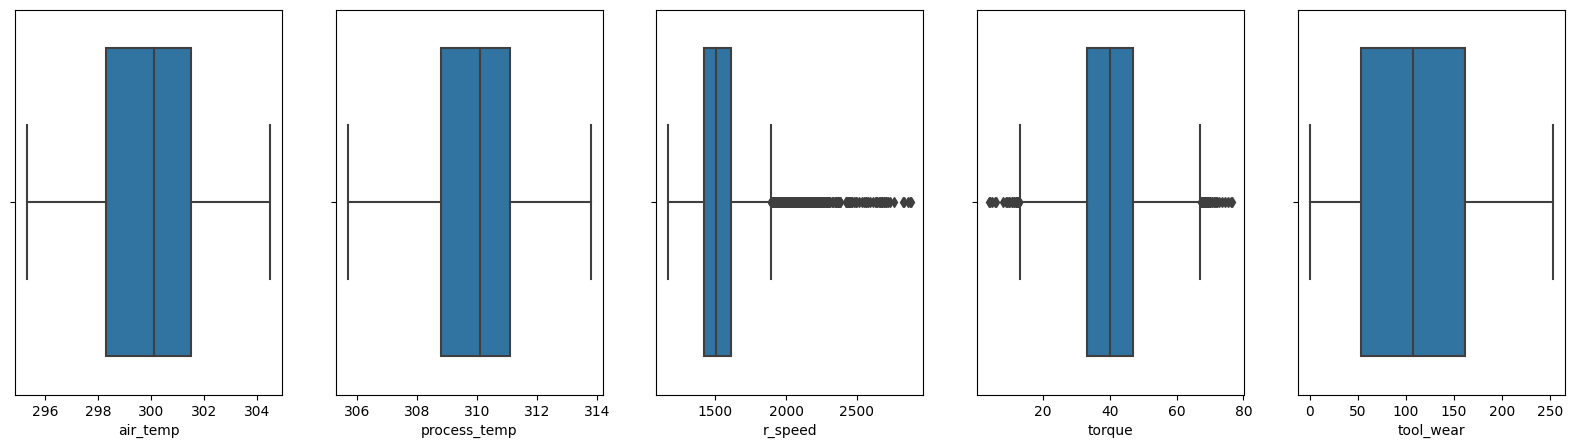

In [ ]:
sub_df = df[['air_temp', 'process_temp', 'r_speed', 'torque', 'tool_wear']]

fig, axs = plt.subplots(ncols = 5, figsize = (20, 5))

for i, col in enumerate(sub_df):
    sns.boxplot(x=sub_df[col], ax=axs[i])

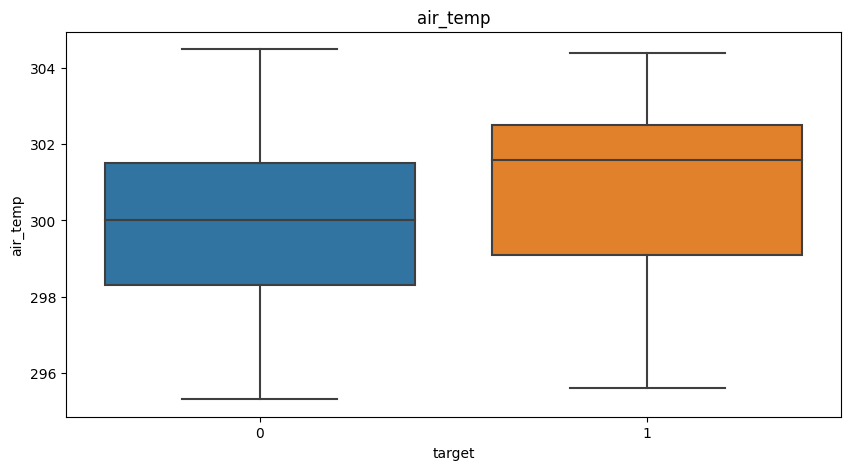

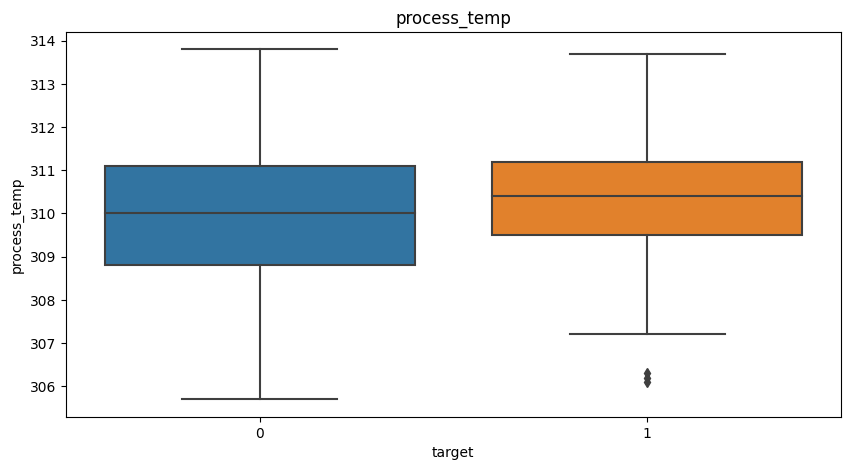

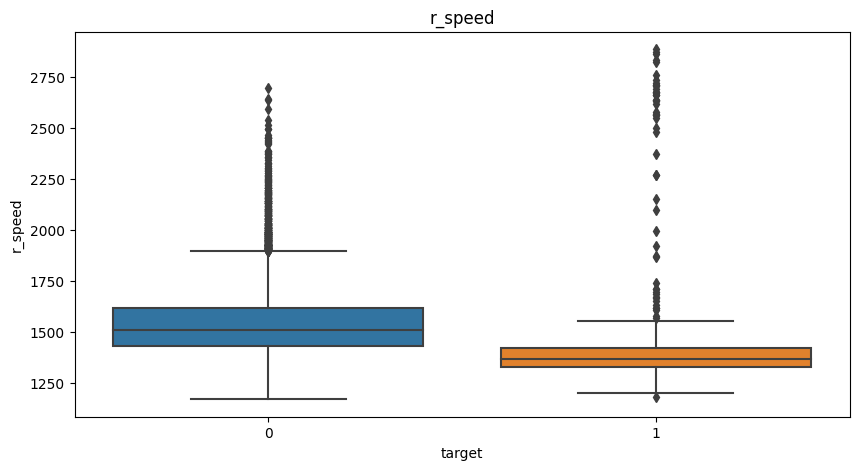

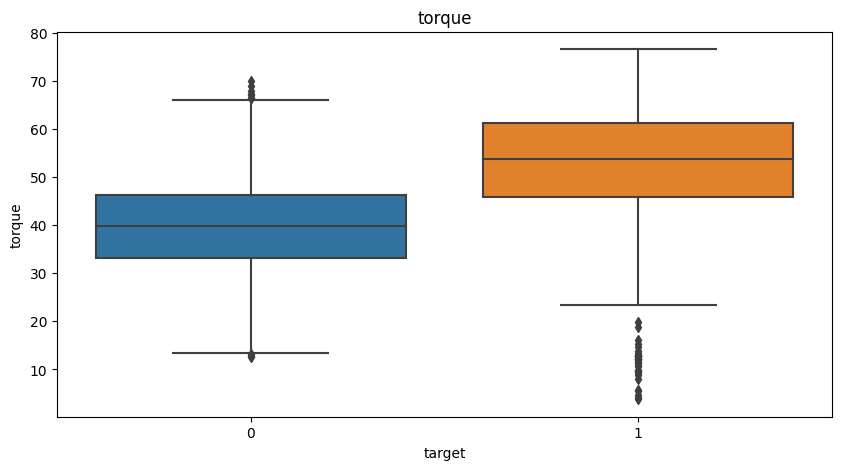

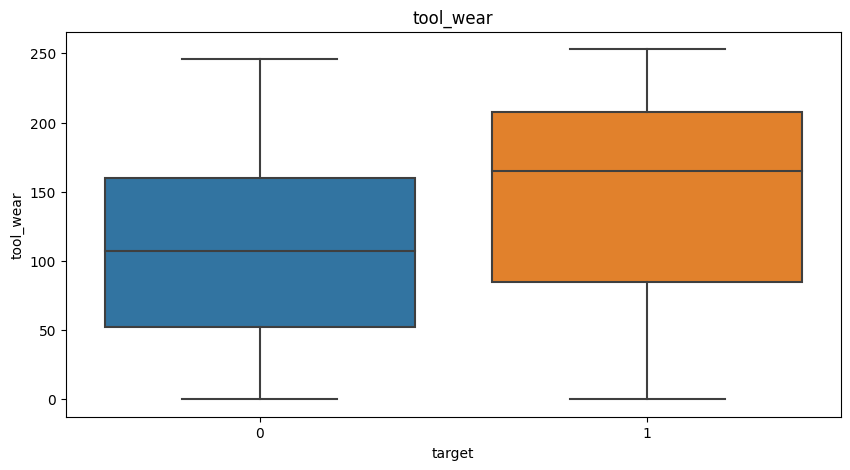

In [ ]:
for col in df.columns:
    if col != 'target' and df[col].dtype != 'object':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(x='target', y=col, data=df, ax=ax)
        ax.set_title(col)

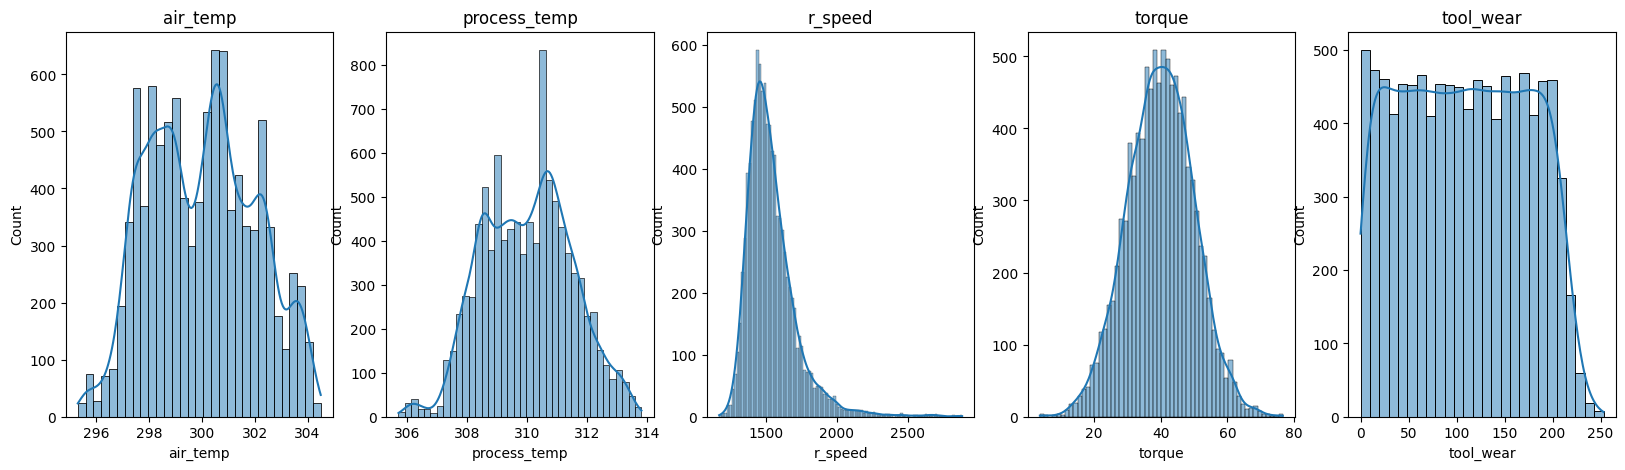

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, col in enumerate(sub_df.columns):
    sns.histplot(sub_df[col], kde=True, ax=ax[i])
    ax[i].set_title(col)

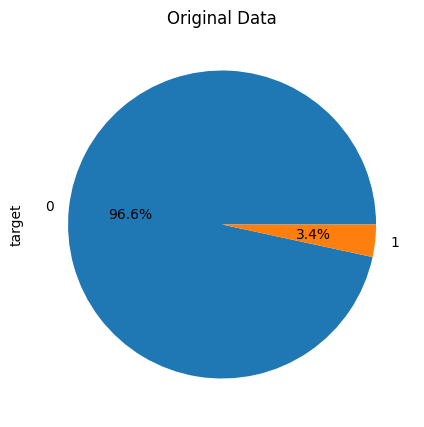

In [ ]:
faulty = []
not_faulty = []

for i in df['target'].values:
  if i == 0:
    faulty.append(i)
  else:
    not_faulty.append(i)

fig, ax = plt.subplots(figsize=(5, 5))
df.target.value_counts().plot.pie(autopct='%1.1f%%');
plt.title('Original Data');

## Data preprocessing

#### outliers

In [ ]:
def detect_outliers(df, target, detect_col):
    target_vals = df[target].unique()
    outliers = []
    
    for val in target_vals:
        target_df = df[df[target] == val]
        q1 = target_df[detect_col].quantile(0.25)
        q3 = target_df[detect_col].quantile(0.75)
        iqr = q3 - q1
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)
        target_outliers = target_df[(target_df[detect_col] <= minimum) | (target_df[detect_col] >= maximum)]
        outliers.append(target_outliers)
        
    return pd.concat(outliers)

In [ ]:
ptemp_outliers = detect_outliers(df, 'target', 'process_temp')
rspeed_outliers = detect_outliers(df, 'target', 'r_speed')
torque_outliers = detect_outliers(df, 'target', 'torque')
power_outliers = detect_outliers(df, 'target', 'power')
vibration_outliers = detect_outliers(df, 'target', 'vibration')

outliers = pd.concat([ptemp_outliers, rspeed_outliers, torque_outliers,
                      power_outliers, vibration_outliers]).drop_duplicates() # (451, 11)

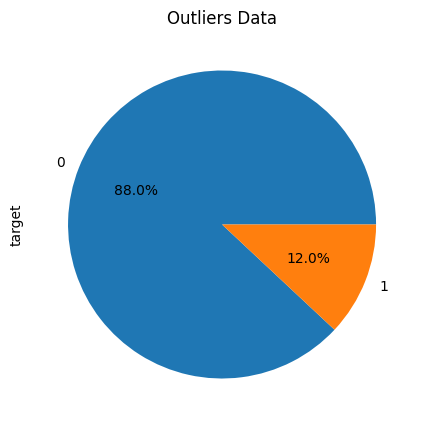

In [ ]:
faulty = []
not_faulty = []

for i in outliers['target'].values:
  if i == 0:
    faulty.append(i)
  else:
    not_faulty.append(i)

fig, ax = plt.subplots(figsize=(5, 5))
outliers.target.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outliers Data');